In [1]:
import pandas as pd
income_data = pd.read_csv("income.csv")

#delete all ?s
income_data = income_data[income_data['workclass'] != " ?"]
income_data = income_data[income_data['occupation'] != " ?"]
income_data = income_data[income_data['native-country'] != " ?"]

xvar = income_data[['age', 'workclass', 'fnlwght', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']]

#dummy variables
xvar = pd.get_dummies(xvar, columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'])

yvar = income_data['income']
yvar = yvar.apply(lambda x: 0 if x == " <=50K" else 1)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(xvar, yvar, test_size=0.2)

from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
from sklearn import metrics
print("Accuracy:" , metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score:", metrics.f1_score(y_test, y_pred))

#visualize tree
text_representation = tree.export_text(clf)
with open("decision_tree.log", "w") as fout:
    fout.write(text_representation)
text_representation_trunc = tree.export_text(clf, max_depth = 3)
with open("decision_tree_trunc.log", "w") as fout:
    fout.write(text_representation_trunc)

Accuracy: 0.8176694845019061
Precision: 0.6248285322359396
Recall: 0.6222677595628415
F1 Score: 0.623545516769336


Build a Fair (I think) Model

In [4]:
xvar = income_data[['age', 'workclass', 'fnlwght', 'education', 'education-num', 'occupation', 'capital-gain', 'capital-loss', 'hours-per-week']]

#dummy variables
xvar = pd.get_dummies(xvar, columns=['workclass', 'education', 'occupation'])

yvar = income_data['income']
yvar = yvar.apply(lambda x: 0 if x == " <=50K" else 1)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(xvar, yvar, test_size=0.2)

from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
from sklearn import metrics
print("Accuracy:" , metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score:", metrics.f1_score(y_test, y_pred))

Accuracy: 0.7754019559091663
Precision: 0.548941798941799
Recall: 0.552228875582169
F1 Score: 0.5505804311774462


False Positive Calculation

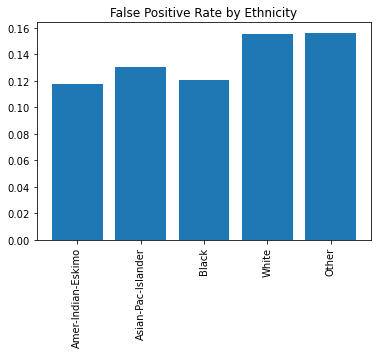

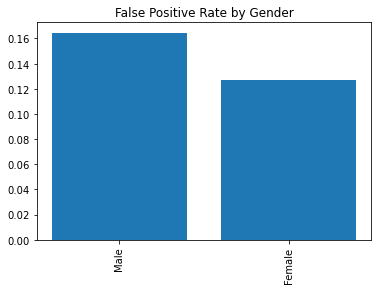

In [12]:
i = 0
negative_amer = 0
fp_amer = 0
negative_asian = 0
fp_asian = 0
negative_black = 0
fp_black = 0
negative_white = 0
fp_white = 0
negative_other = 0
fp_other = 0
negative_male = 0
fp_male = 0
negative_female = 0
fp_female = 0

for index, row in y_test.items():
    if(income_data.at[index, 'race'] == ' Amer-Indian-Eskimo'):
        if(not row):
            negative_amer += 1
            if(y_pred[i]):
                fp_amer += 1
    if(income_data.at[index, 'race'] == ' Asian-Pac-Islander'):
        if(not row):
            negative_asian += 1
            if(y_pred[i]):
                fp_asian += 1
    if(income_data.at[index, 'race'] == ' Black'):
        if(not row):
            negative_black += 1
            if(y_pred[i]):
                fp_black += 1
    if(income_data.at[index, 'race'] == ' White'):
        if(not row):
            negative_white += 1
            if(y_pred[i]):
                fp_white += 1
    if(income_data.at[index, 'race'] == ' Other'):
        if(not row):
            negative_other += 1
            if(y_pred[i]):
                fp_other += 1
    if(income_data.at[index, 'sex'] == ' Male'):
        if(not row):
            negative_male += 1
            if(y_pred[i]):
                fp_male += 1
    if(income_data.at[index, 'sex'] == ' Female'):
        if(not row):
            negative_female += 1
            if(y_pred[i]):
                fp_female += 1
    

    i += 1

xplot = ['Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'White', 'Other']
yplot = [fp_amer/negative_amer, fp_asian/negative_asian, fp_black/negative_black, fp_white/negative_white, fp_other/negative_other]
import matplotlib.pyplot as plt
plt.bar(xplot, yplot)
plt.xticks(rotation=90)
plt.title("False Positive Rate by Ethnicity")
plt.show()

xplot = ['Male', 'Female']
yplot = [fp_male/negative_male, fp_female/negative_female]
plt.bar(xplot, yplot)
plt.xticks(rotation=90)
plt.title("False Positive Rate by Gender")
plt.show()

False Negative Rate

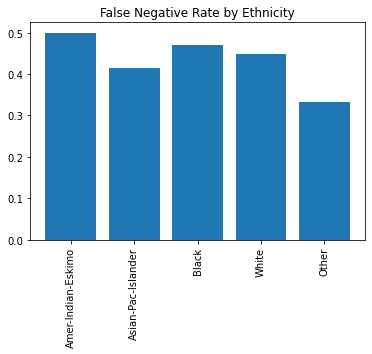

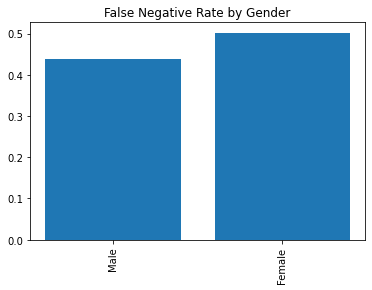

In [14]:
i = 0
positive_amer = 0
fn_amer = 0
positive_asian = 0
fn_asian = 0
positive_black = 0
fn_black = 0
positive_white = 0
fn_white = 0
positive_other = 0
fn_other = 0
positive_male = 0
fn_male = 0
positive_female = 0
fn_female = 0

for index, row in y_test.items():
    if(income_data.at[index, 'race'] == ' Amer-Indian-Eskimo'):
        if(row):
            positive_amer += 1
            if(not y_pred[i]):
                fn_amer += 1
    if(income_data.at[index, 'race'] == ' Asian-Pac-Islander'):
        if(row):
            positive_asian += 1
            if(not y_pred[i]):
                fn_asian += 1
    if(income_data.at[index, 'race'] == ' Black'):
        if(row):
            positive_black += 1
            if(not y_pred[i]):
                fn_black += 1
    if(income_data.at[index, 'race'] == ' White'):
        if(row):
            positive_white += 1
            if(not y_pred[i]):
                fn_white += 1
    if(income_data.at[index, 'race'] == ' Other'):
        if(row):
            positive_other += 1
            if(not y_pred[i]):
                fn_other += 1
    if(income_data.at[index, 'sex'] == ' Male'):
        if(row):
            positive_male += 1
            if(not y_pred[i]):
                fn_male += 1
    if(income_data.at[index, 'sex'] == ' Female'):
        if(row):
            positive_female += 1
            if(not y_pred[i]):
                fn_female += 1
    

    i += 1

xplot = ['Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'White', 'Other']
yplot = [fn_amer/positive_amer, fn_asian/positive_asian, fn_black/positive_black, fn_white/positive_white, fn_other/positive_other]
import matplotlib.pyplot as plt
plt.bar(xplot, yplot)
plt.xticks(rotation=90)
plt.title("False Negative Rate by Ethnicity")
plt.show()

xplot = ['Male', 'Female']
yplot = [fn_male/positive_male, fn_female/positive_female]
plt.bar(xplot, yplot)
plt.xticks(rotation=90)
plt.title("False Negative Rate by Gender")
plt.show()

Calculate disparate impact

In [33]:
sexarr = []
racearr = []

for index, row in y_test.items():
    sexarr.append(income_data.at[index, 'sex'])
    racearr.append(income_data.at[index, 'race'])

preddf = pd.DataFrame({'race' : racearr, 'sex' : sexarr, 'income' : y_pred})

racegroup = preddf.groupby('race')['income'].value_counts()
sexgroup = preddf.groupby('sex')['income'].value_counts()


totalmember_race = racegroup.sum()
totalpositive_race = sum(racegroup[1::2])
totalmember_sex = sexgroup.sum()
totalpositive_sex = sum(sexgroup[1::2])

xplot = ['Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'Other', 'White']
i = 0
for race in xplot:
    disparate_impact = racegroup[i + 1]/racegroup[i] / ((totalpositive_race - racegroup[i + 1]) / (totalmember_race - racegroup[i]))
    print("Disparate Impact for " + race + ": " + str(disparate_impact))
    i += 2

xplot = ['Female', 'Male']
i = 0
for sex in xplot:
    disparate_impact = sexgroup[i + 1]/sexgroup[i] / ((totalpositive_sex - sexgroup[i + 1]) / (totalmember_sex - sexgroup[i]))
    print("Disparate Impact for " + sex + ": " + str(disparate_impact))
    i += 2


Disparate Impact for Amer-Indian-Eskimo: 0.746631736526946
Disparate Impact for Asian-Pac-Islander: 1.4683070084927374
Disparate Impact for Black: 0.819533490535976
Disparate Impact for Other: 0.9975083056478404
Disparate Impact for White: 4.879116358852232
Disparate Impact for Female: 0.7631323011215347
Disparate Impact for Male: 3.8730926860025217


Predictions1 and Predictions2 Analysis

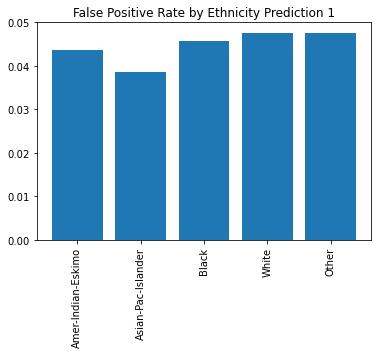

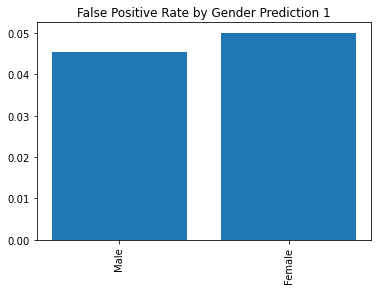

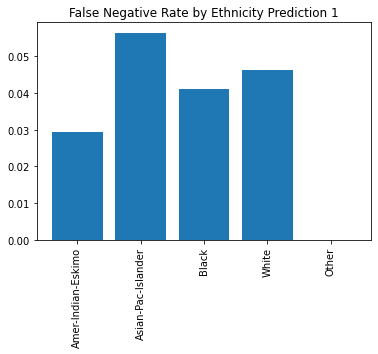

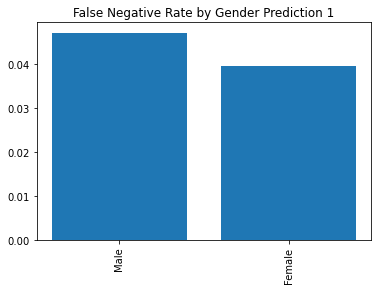

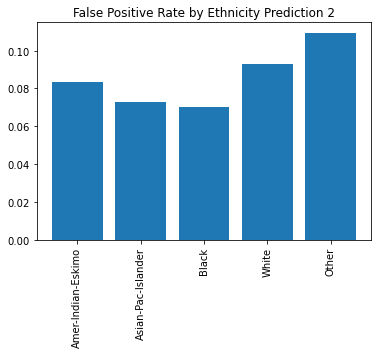

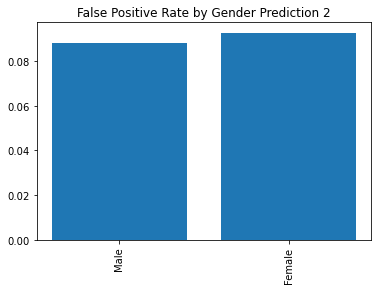

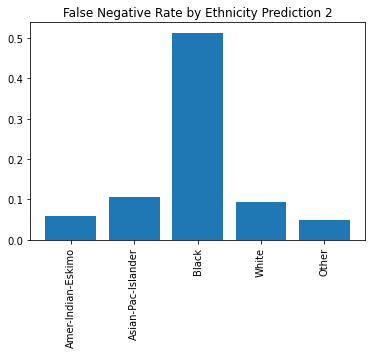

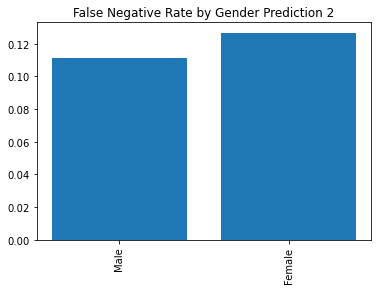

Prediction 1 Disparate Impact for Amer-Indian-Eskimo: 0.664630421502749
Prediction 1 Disparate Impact for Asian-Pac-Islander: 1.5086515470751167
Prediction 1 Disparate Impact for Black: 0.7042825062999272
Prediction 1 Disparate Impact for Other: 0.5664930470846549
Prediction 1 Disparate Impact for White: 5.877436853255651
Prediction 1 Disparate Impact for Female: 0.5900722375544798
Prediction 1 Disparate Impact for Male: 5.415569981985493
Prediction 2 Disparate Impact for Amer-Indian-Eskimo: 0.7881319889061905
Prediction 2 Disparate Impact for Asian-Pac-Islander: 1.5070039444843604
Prediction 2 Disparate Impact for Black: 0.4710664162217619
Prediction 2 Disparate Impact for Other: 0.7927561654890074
Prediction 2 Disparate Impact for White: 7.581988207259689
Prediction 2 Disparate Impact for Female: 0.7101421630567181
Prediction 2 Disparate Impact for Male: 4.832223142778238


In [62]:

negative_amer = 0
fp_amer = 0
negative_asian = 0
fp_asian = 0
negative_black = 0
fp_black = 0
negative_white = 0
fp_white = 0
negative_other = 0
fp_other = 0
negative_male = 0
fp_male = 0
negative_female = 0
fp_female = 0

for index, row in income_data.iterrows():
    if(row['race'] == ' Amer-Indian-Eskimo'):
        if(row['income'] == ' <=50K'):
            negative_amer += 1
            if(row['predictions1']):
                fp_amer += 1
    if(row['race'] == ' Asian-Pac-Islander'):
        if(row['income'] == ' <=50K'):
            negative_asian += 1
            if(row['predictions1']):
                fp_asian += 1
    if(row['race'] == ' Black'):
        if(row['income'] == ' <=50K'):
            negative_black += 1
            if(row['predictions1']):
                fp_black += 1
    if(row['race'] == ' White'):
        if(row['income'] == ' <=50K'):
            negative_white += 1
            if(row['predictions1']):
                fp_white += 1
    if(row['race'] == ' Other'):
        if(row['income'] == ' <=50K'):
            negative_other += 1
            if(row['predictions1']):
                fp_other += 1
    if(row['sex'] == ' Male'):
        if(row['income'] == ' <=50K'):
            negative_male += 1
            if(row['predictions1']):
                fp_male += 1
    if(row['sex'] == ' Female'):
        if(row['income'] == ' <=50K'):
            negative_female += 1
            if(row['predictions1']):
                fp_female += 1

plt.clf()

xplot = ['Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'White', 'Other']
yplot = [fp_amer/negative_amer, fp_asian/negative_asian, fp_black/negative_black, fp_white/negative_white, fp_other/negative_other]
import matplotlib.pyplot as plt
plt.bar(xplot, yplot)
plt.xticks(rotation=90)
plt.title("False Positive Rate by Ethnicity Prediction 1")
plt.show()

plt.clf()

xplot = ['Male', 'Female']
yplot = [fp_male/negative_male, fp_female/negative_female]
plt.bar(xplot, yplot)
plt.xticks(rotation=90)
plt.title("False Positive Rate by Gender Prediction 1")
plt.show()

positive_amer = 0
fn_amer = 0
positive_asian = 0
fn_asian = 0
positive_black = 0
fn_black = 0
positive_white = 0
fn_white = 0
positive_other = 0
fn_other = 0
positive_male = 0
fn_male = 0
positive_female = 0
fn_female = 0

for index, row in income_data.iterrows():
    if(row['race'] == ' Amer-Indian-Eskimo'):
        if(row['income'] != ' <=50K'):
            positive_amer += 1
            if(not row['predictions1']):
                fn_amer += 1
    if(row['race'] == ' Asian-Pac-Islander'):
        if(row['income'] != ' <=50K'):
            positive_asian += 1
            if(not row['predictions1']):
                fn_asian += 1
    if(row['race'] == ' Black'):
        if(row['income'] != ' <=50K'):
            positive_black += 1
            if(not row['predictions1']):
                fn_black += 1
    if(row['race'] == ' White'):
        if(row['income'] != ' <=50K'):
            positive_white += 1
            if(not row['predictions1']):
                fn_white += 1
    if(row['race'] == ' Other'):
        if(row['income'] != ' <=50K'):
            positive_other += 1
            if(not row['predictions1']):
                fn_other += 1
    if(row['sex'] == ' Male'):
        if(row['income'] != ' <=50K'):
            positive_male += 1
            if(not row['predictions1']):
                fn_male += 1
    if(row['sex'] == ' Female'):
        if(row['income'] != ' <=50K'):
            positive_female += 1
            if(not row['predictions1']):
                fn_female += 1

plt.clf()

xplot = ['Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'White', 'Other']
yplot = [fn_amer/positive_amer, fn_asian/positive_asian, fn_black/positive_black, fn_white/positive_white, fn_other/positive_other]
import matplotlib.pyplot as plt
plt.bar(xplot, yplot)
plt.xticks(rotation=90)
plt.title("False Negative Rate by Ethnicity Prediction 1")
plt.show()

plt.clf()

xplot = ['Male', 'Female']
yplot = [fn_male/positive_male, fn_female/positive_female]
plt.bar(xplot, yplot)
plt.xticks(rotation=90)
plt.title("False Negative Rate by Gender Prediction 1")
plt.show()



negative_amer = 0
fp_amer = 0
negative_asian = 0
fp_asian = 0
negative_black = 0
fp_black = 0
negative_white = 0
fp_white = 0
negative_other = 0
fp_other = 0
negative_male = 0
fp_male = 0
negative_female = 0
fp_female = 0

for index, row in income_data.iterrows():
    if(row['race'] == ' Amer-Indian-Eskimo'):
        if(row['income'] == ' <=50K'):
            negative_amer += 1
            if(row['predictions2']):
                fp_amer += 1
    if(row['race'] == ' Asian-Pac-Islander'):
        if(row['income'] == ' <=50K'):
            negative_asian += 1
            if(row['predictions2']):
                fp_asian += 1
    if(row['race'] == ' Black'):
        if(row['income'] == ' <=50K'):
            negative_black += 1
            if(row['predictions2']):
                fp_black += 1
    if(row['race'] == ' White'):
        if(row['income'] == ' <=50K'):
            negative_white += 1
            if(row['predictions2']):
                fp_white += 1
    if(row['race'] == ' Other'):
        if(row['income'] == ' <=50K'):
            negative_other += 1
            if(row['predictions2']):
                fp_other += 1
    if(row['sex'] == ' Male'):
        if(row['income'] == ' <=50K'):
            negative_male += 1
            if(row['predictions2']):
                fp_male += 1
    if(row['sex'] == ' Female'):
        if(row['income'] == ' <=50K'):
            negative_female += 1
            if(row['predictions2']):
                fp_female += 1

plt.clf()

xplot = ['Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'White', 'Other']
yplot = [fp_amer/negative_amer, fp_asian/negative_asian, fp_black/negative_black, fp_white/negative_white, fp_other/negative_other]
import matplotlib.pyplot as plt
plt.bar(xplot, yplot)
plt.xticks(rotation=90)
plt.title("False Positive Rate by Ethnicity Prediction 2")
plt.show()

plt.clf()

xplot = ['Male', 'Female']
yplot = [fp_male/negative_male, fp_female/negative_female]
plt.bar(xplot, yplot)
plt.xticks(rotation=90)
plt.title("False Positive Rate by Gender Prediction 2")
plt.show()

positive_amer = 0
fn_amer = 0
positive_asian = 0
fn_asian = 0
positive_black = 0
fn_black = 0
positive_white = 0
fn_white = 0
positive_other = 0
fn_other = 0
positive_male = 0
fn_male = 0
positive_female = 0
fn_female = 0

for index, row in income_data.iterrows():
    if(row['race'] == ' Amer-Indian-Eskimo'):
        if(row['income'] != ' <=50K'):
            positive_amer += 1
            if(not row['predictions2']):
                fn_amer += 1
    if(row['race'] == ' Asian-Pac-Islander'):
        if(row['income'] != ' <=50K'):
            positive_asian += 1
            if(not row['predictions2']):
                fn_asian += 1
    if(row['race'] == ' Black'):
        if(row['income'] != ' <=50K'):
            positive_black += 1
            if(not row['predictions2']):
                fn_black += 1
    if(row['race'] == ' White'):
        if(row['income'] != ' <=50K'):
            positive_white += 1
            if(not row['predictions2']):
                fn_white += 1
    if(row['race'] == ' Other'):
        if(row['income'] != ' <=50K'):
            positive_other += 1
            if(not row['predictions2']):
                fn_other += 1
    if(row['sex'] == ' Male'):
        if(row['income'] != ' <=50K'):
            positive_male += 1
            if(not row['predictions2']):
                fn_male += 1
    if(row['sex'] == ' Female'):
        if(row['income'] != ' <=50K'):
            positive_female += 1
            if(not row['predictions2']):
                fn_female += 1

plt.clf()

xplot = ['Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'White', 'Other']
yplot = [fn_amer/positive_amer, fn_asian/positive_asian, fn_black/positive_black, fn_white/positive_white, fn_other/positive_other]
import matplotlib.pyplot as plt
plt.bar(xplot, yplot)
plt.xticks(rotation=90)
plt.title("False Negative Rate by Ethnicity Prediction 2")
plt.show()

plt.clf()

xplot = ['Male', 'Female']
yplot = [fn_male/positive_male, fn_female/positive_female]
plt.bar(xplot, yplot)
plt.xticks(rotation=90)
plt.title("False Negative Rate by Gender Prediction 2")
plt.show()



racegroup = income_data.groupby('race')['predictions1'].value_counts()
sexgroup = income_data.groupby('sex')['predictions1'].value_counts()


totalmember_race = racegroup.sum()
totalpositive_race = sum(racegroup[1::2])
totalmember_sex = sexgroup.sum()
totalpositive_sex = sum(sexgroup[1::2])

xplot = ['Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'Other', 'White']
i = 0
for race in xplot:
    disparate_impact = racegroup[i + 1]/racegroup[i] / ((totalpositive_race - racegroup[i + 1]) / (totalmember_race - racegroup[i]))
    print("Prediction 1 Disparate Impact for " + race + ": " + str(disparate_impact))
    i += 2

xplot = ['Female', 'Male']
i = 0
for sex in xplot:
    disparate_impact = sexgroup[i + 1]/sexgroup[i] / ((totalpositive_sex - sexgroup[i + 1]) / (totalmember_sex - sexgroup[i]))
    print("Prediction 1 Disparate Impact for " + sex + ": " + str(disparate_impact))
    i += 2

racegroup = income_data.groupby('race')['predictions2'].value_counts()
sexgroup = income_data.groupby('sex')['predictions2'].value_counts()


totalmember_race = racegroup.sum()
totalpositive_race = sum(racegroup[1::2])
totalmember_sex = sexgroup.sum()
totalpositive_sex = sum(sexgroup[1::2])

xplot = ['Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'Other', 'White']
i = 0
for race in xplot:
    disparate_impact = racegroup[i + 1]/racegroup[i] / ((totalpositive_race - racegroup[i + 1]) / (totalmember_race - racegroup[i]))
    print("Prediction 2 Disparate Impact for " + race + ": " + str(disparate_impact))
    i += 2

xplot = ['Female', 'Male']
i = 0
for sex in xplot:
    disparate_impact = sexgroup[i + 1]/sexgroup[i] / ((totalpositive_sex - sexgroup[i + 1]) / (totalmember_sex - sexgroup[i]))
    print("Prediction 2 Disparate Impact for " + sex + ": " + str(disparate_impact))
    i += 2




Intersectionality Comaprison between Black Female and White Male by comaparing FPR, FNR and disparate impact in outcomes

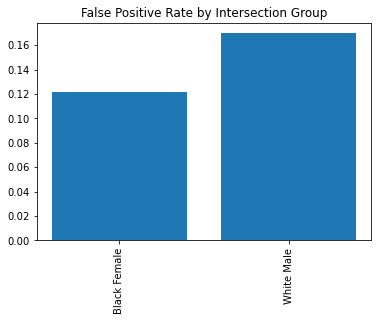

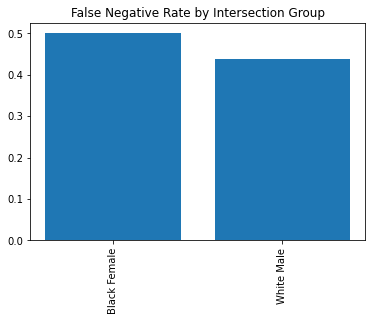

Disparate Impact for Black Female: 0.19238707628800505
Disparate Impact for White Male: 5.197854342892511


In [70]:
negative_bf = 0
fp_bf = 0
negative_wm = 0
fp_wm = 0
i = 0

for index, row in y_test.items():
    if(income_data.at[index, 'race'] == ' Black' and income_data.at[index, 'sex'] == ' Female'):
        if(not row):
            negative_bf += 1
            if(y_pred[i]):
                fp_bf += 1
    if(income_data.at[index, 'race'] == ' White' and income_data.at[index, 'sex'] == ' Male'):
        if(not row):
            negative_wm += 1
            if(y_pred[i]):
                fp_wm += 1

    i += 1

xplot = ['Black Female', 'White Male']
yplot = [fp_bf/negative_bf, fp_wm/negative_wm]
import matplotlib.pyplot as plt
plt.bar(xplot, yplot)
plt.xticks(rotation=90)
plt.title("False Positive Rate by Intersection Group")
plt.show()


positive_bf = 0
fn_bf = 0
positive_wm = 0
fn_wm = 0
i = 0

for index, row in y_test.items():
    if(income_data.at[index, 'race'] == ' Black' and income_data.at[index, 'sex'] == ' Female'):
        if(row):
            positive_bf += 1
            if(not y_pred[i]):
                fn_bf += 1
    if(income_data.at[index, 'race'] == ' White' and income_data.at[index, 'sex'] == ' Male'):
        if(row):
            positive_wm += 1
            if(not y_pred[i]):
                fn_wm += 1
    
    i+= 1

xplot = ['Black Female', 'White Male']
yplot = [fn_bf/positive_bf, fn_wm/positive_wm]
import matplotlib.pyplot as plt
plt.bar(xplot, yplot)
plt.xticks(rotation=90)
plt.title("False Negative Rate by Intersection Group")
plt.show()


intersectiongroup = preddf.groupby(['race', 'sex'])['income'].value_counts()
bfprob = intersectiongroup[9] / (intersectiongroup[8] + intersectiongroup[9])
wmprob = intersectiongroup[18] / (intersectiongroup[18] + intersectiongroup[19])
print("Disparate Impact for Black Female: " + str(bfprob/wmprob))
print("Disparate Impact for White Male: " + str(wmprob/bfprob))